100%|██████████| 55/55 [06:00<00:00,  6.55s/it]


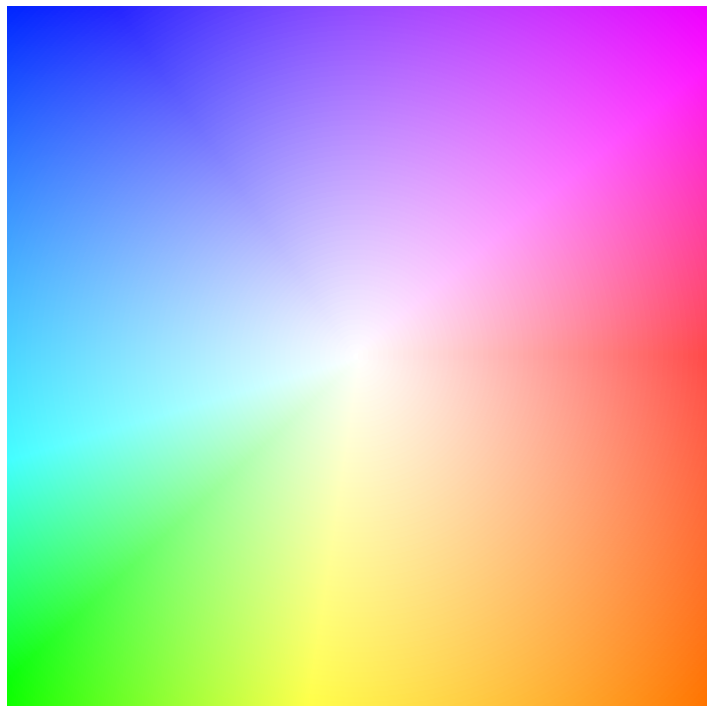

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import sin,cos
from pylab import rcParams
rcParams['figure.figsize']=10,10
lim=np.sqrt(2)/2

def radial_gradient(color,radii):
    colors=[]
    for r in radii:
        colorr=r*color+(1-r)*np.array([1,1,1])
        colors.append(colorr)
    return colors

def add_colors(colorwheel,cname,col,channel,key):
    if key==0:
        colorwheel[col:col+cname,channel]=255
        colorwheel[col:col+cname,(channel+1)%3]=np.floor(255*np.arange(cname)/cname)
    elif key==1:
        colorwheel[col:col+cname,channel]=255-np.floor(255*np.arange(cname)/cname)
        colorwheel[col:col+cname,(channel+1)%3]=255

def gen_colorwheel():
    RY,YG,GC,CB,BM,MR=15,6,4,11,13,6
    ncols=RY+YG+GC+CB+BM+MR
    colorwheel=np.zeros((ncols,3))
    col=0

    add_colors(colorwheel,RY,col,0,0)
    col=col+RY
    add_colors(colorwheel,YG,col,0,1)
    col=col+YG
    add_colors(colorwheel,GC,col,1,0)
    col=col+GC
    add_colors(colorwheel,CB,col,1,1)
    col=col+CB
    add_colors(colorwheel,BM,col,2,0)
    col=col+BM
    add_colors(colorwheel,MR,col,2,1)
    return colorwheel/255.0

color_wheel=gen_colorwheel()

def plot_colorwheel(colorwheel,steps):
    theta=(2*np.pi)/colorwheel.shape[0]
    x=np.linspace(0,1,100)
    N=colorwheel.shape[0]
    for i in tqdm(range(N)):
        angles=np.linspace(i*theta,(i+1)*theta,steps)
        colors=np.linspace(colorwheel[i],colorwheel[(i+1)%N],steps)
        for j in range(steps):
            color=colors[j]
            line=radial_gradient(color,x)
            for k in range(len(x)):
                plt.scatter(x[k]*cos(angles[j]),-x[k]*sin(angles[j]),color=line[k])
                plt.axis('off')
                plt.xlim(-lim,lim)
                plt.ylim(-lim,lim)
    plt.tight_layout()
    plt.savefig('colorwheel.png')
plot_colorwheel(color_wheel,20)

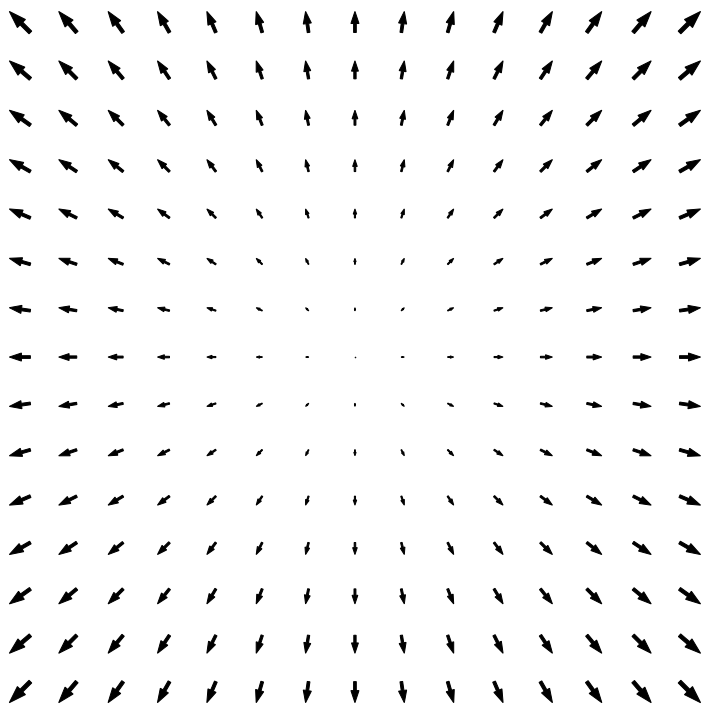

In [22]:

def plot_vectors(max_length=5, size=257, step=16):
    plt.xlim(8, size-8)
    plt.ylim(8, size-8)
    plt.axis("off")
    width, height = size, size
    center = (height // 2, width // 2)
    max_norm = np.sqrt(center[0] ** 2 + center[1] ** 2)
    for i in range(0, height, step):
        for j in range(0, width, step):
            v = (i - center[0], j - center[1])
            norm_v = np.sqrt(v[0] ** 2 + v[1] ** 2) + 1e-12
            unit_v = (v[0] / norm_v, v[1] / norm_v)
            delta = max_length * norm_v / max_norm
            if norm_v == 1e-12:
                plt.plot(j, i, "ko", markersize=0.6)
            else:
                plt.arrow(j, i, unit_v[1] * delta, unit_v[0] * delta, width=0.3 * delta, color="k")
    plt.tight_layout()
#     plt.show()
    plt.savefig('vectorwheel.pdf')
    
plot_vectors()